In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

file_name = 'FTO_RT_rinse_2'
data = pd.read_excel(f'{file_name}.xlsx')
data.head()

,1,2,3,4,5,6,7,8,9,10,11,12
0,0.239065,273.594403,0.239314,967.188324,0.238783,1619.755948,0.238893,2751.943462,0.238859,3454.605869,0.238924,3820.310810
1,0.239531,273.640553,0.240321,967.148278,0.239349,1619.424664,0.239439,2755.404612,0.239441,3459.292608,0.239431,3829.518465
2,0.240537,273.711886,0.241298,966.959053,0.240342,1619.960314,0.240446,2760.344700,0.240439,3468.787714,0.240440,3843.800012
3,0.241534,273.686203,0.242300,967.002738,0.241363,1620.795100,0.241440,2765.473040,0.241435,3479.124673,0.241440,3858.764373
4,0.242559,273.829625,0.243304,967.217930,0.242369,1621.211634,0.242439,2770.111016,0.242419,3489.228924,0.242432,3873.710850


In [38]:
data.iloc[:,0].head()

0    0.239065
1    0.239531
2    0.240537
3    0.241534
4    0.242559
Name: 1, dtype: float64

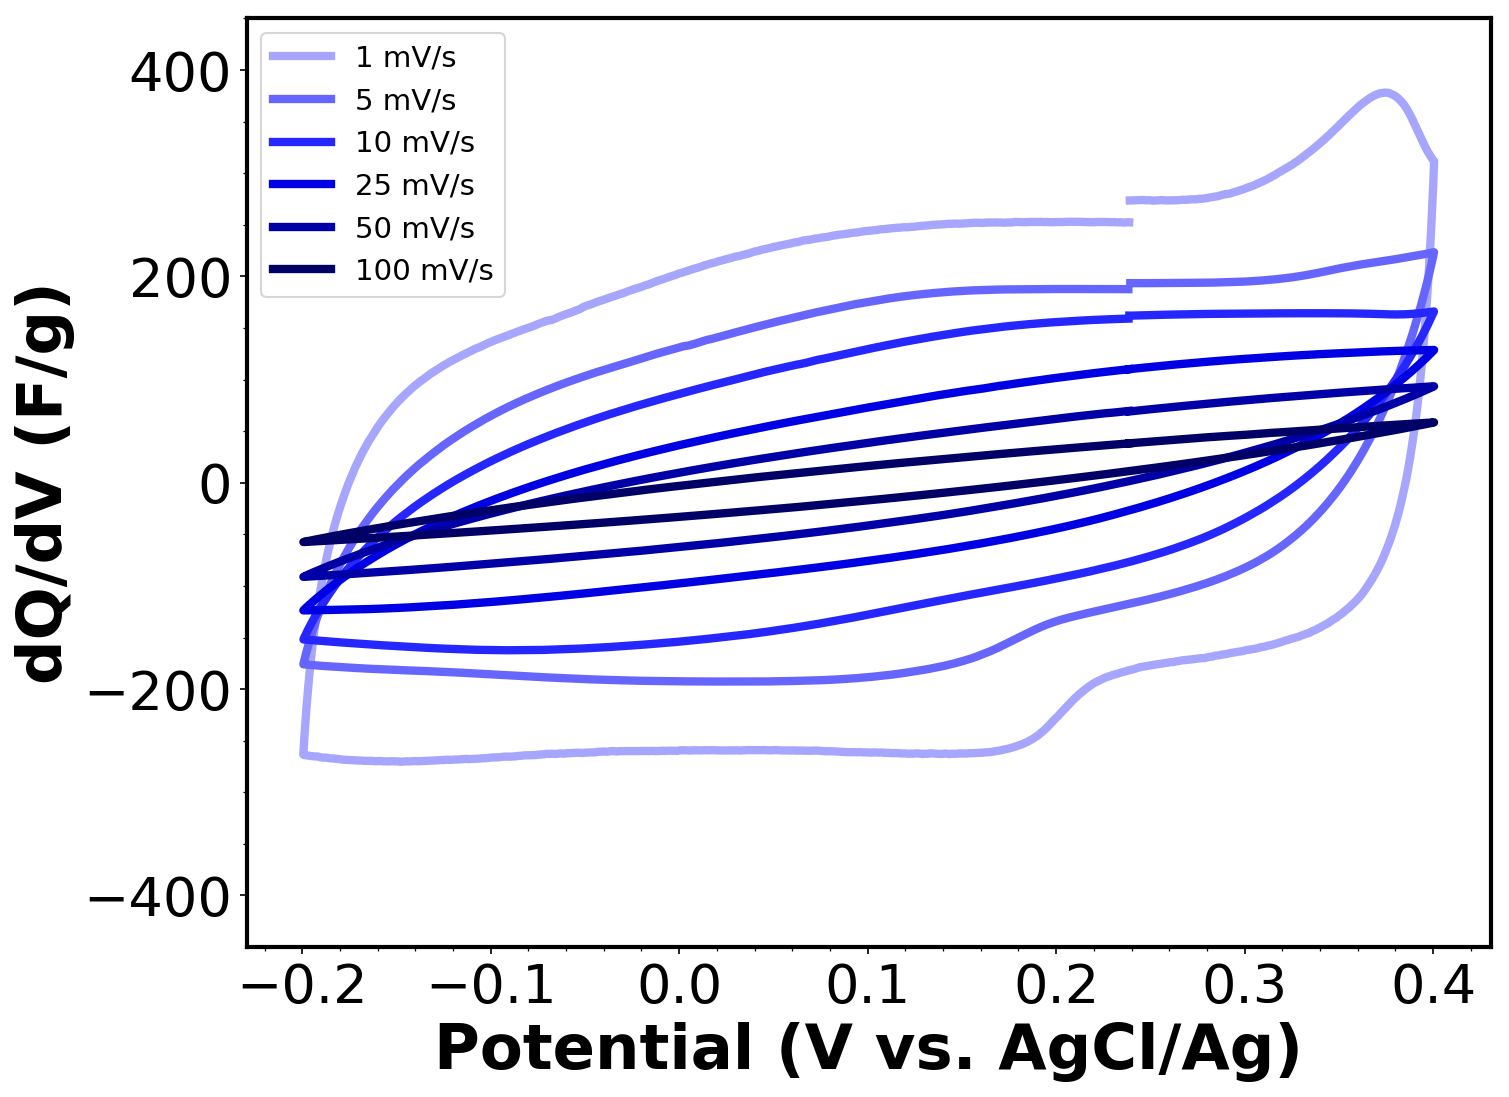

In [39]:
def lighten_color(color, amount=0.5):
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

fig, ax = plt.subplots(figsize=(10.7, 8.2), dpi=150)
scan_rate = [1, 5, 10, 25, 50, 100]
c = 0.1

for i in range(0, len(scan_rate)*2 - 1, 2):
    c +=0.25
    ax.plot(np.array(data.iloc[:, i]),
            np.array(data.iloc[:, i+1])/(scan_rate[int(i/2)]),
            linewidth = 4,
            color=lighten_color('blue', c),
            label = f'{scan_rate[int(i/2)]} mV/s')
#        print('---',data.columns[i])
        
ax.legend(loc = 'upper left', fontsize = 14)
plt.xlabel('Potential (V vs. AgCl/Ag)', fontsize = 30, weight = 'bold')
plt.ylabel('dQ/dV (F/g)', fontsize = 30, weight = 'bold')

#plt.text(0.03, 1100, file_name, fontsize = 22, color = 'red')

ax.xaxis.set_tick_params(labelsize=26)
ax.yaxis.set_tick_params(labelsize=26)
plt.minorticks_on()
ax.set_ylim(-450, 450)

ax.spines["bottom"].set_linewidth(2)
ax.spines["top"].set_linewidth(2)
ax.spines["right"].set_linewidth(2)
ax.spines["left"].set_linewidth(2)

plt.savefig(f'CV_{file_name}.tif', bbox_inches = 'tight')

plt.show()